In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from collections import Counter

In [ ]:
df = pd.read_csv("Train_D.csv")
df = df.drop("id", axis=1)
df = df.drop("reporting date", axis=1)
df = df.drop("If_onset_approximated", axis=1)
df = df.drop("symptom_onset", axis=1)
df = df.drop("hosp_visit_date", axis=1)
df = df.drop("exposure_start", axis=1)
df = df.drop("exposure_end", axis=1)
df = df.drop("location", axis=1)

class_label = df["death"]

for index in range(len(class_label)):
    if class_label[index]=="0" and len(class_label[index])==1:
        class_label[index]=0
    else:
        class_label[index]=1 
df = df.assign(death=class_label)

recov = df["recovered"]

for index in range(len(recov)):
    if recov[index]=="0":
        recov[index]=0
    else:
        recov[index]=1 
df = df.assign(recovered=recov)

coun = df["country"]

for index in range(len(coun)):
    if coun[index]=="China":
        coun[index]=1
    else:
        coun[index]=0 
df = df.assign(country=coun)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: Settin

In [ ]:
class_label = df["death"]
_,class_counts = np.unique(class_label,return_counts=True)

zero_class_indices = [0]*class_counts[0]

indices = 0
for index in range(len(class_label)):
    if class_label[index] == 0:
        zero_class_indices[indices] = index
        indices = indices+1    

class_zero_df = df.loc[zero_class_indices]
class_one_df = df.drop(zero_class_indices)

In [ ]:
def fill_missing_values(df):
    for index in range (df.shape[1]):
        column_objects = df.iloc[:,index]
        occurence_count = Counter(column_objects)
        replacement = occurence_count.most_common(1)[0][0]
        column_objects = column_objects.fillna(replacement)
        df.iloc[:,index] = column_objects    
    return df

In [ ]:
class_zero_df = fill_missing_values(class_zero_df)
class_one_df = fill_missing_values(class_one_df)
frames = [class_zero_df, class_one_df]
df = pd.concat(frames)

In [ ]:
lb_style = LabelBinarizer()
gender_code = lb_style.fit_transform(df["gender"])
df = df.assign(gender = gender_code)

df = df.sample(frac = 1) 

In [ ]:
x = df.drop("death",axis=1)
y = df["death"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)*100

In [ ]:
accuracy

44.23963133640553

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(x)
x = pca.transform(x)


x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_pca = model.predict(x_test)
accuracy_pca = accuracy_score(y_test,y_pred_pca)*100

In [ ]:
accuracy

44.23963133640553

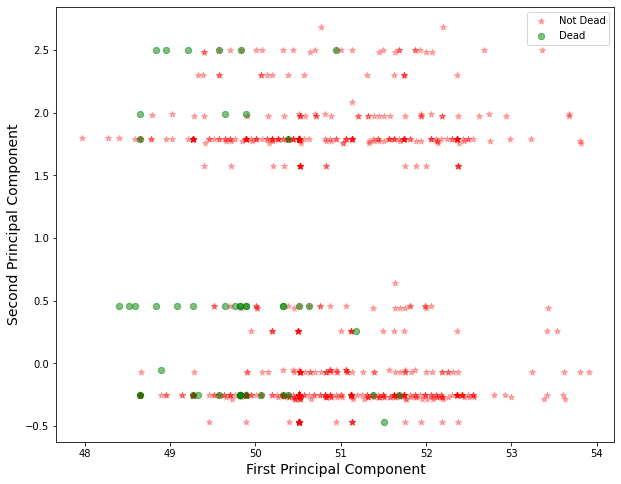

In [ ]:
Xax=x_train[:,0]
Yax=x_train[:,1]
labels=y_train
cdict={0:'red',1:'green'}
labl={0:'Not Dead',1:'Dead'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(10,8))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ix=np.where(labels==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40, label=labl[l],marker=marker[l],alpha=alpha[l])
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()